In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
housing = pd.read_csv('Housing_cleaned.csv', index_col=0)
housing.shape

(2580, 80)

In [3]:
housing.describe()

GrLivArea      SalePrice   MSSubClass  LotFrontage        LotArea  \
count  2580.000000    2580.000000  2580.000000  2118.000000    2580.000000   
mean   1486.039922  178059.623256    57.691860    68.516053   10120.153488   
std     488.650181   75031.089374    42.802105    22.835831    8126.937892   
min     334.000000   12789.000000    20.000000    21.000000    1300.000000   
25%    1112.000000  129975.000000    20.000000    57.000000    7406.750000   
50%    1436.000000  159900.000000    50.000000    68.000000    9391.000000   
75%    1733.000000  209625.000000    70.000000    80.000000   11494.000000   
max    4676.000000  755000.000000   190.000000   313.000000  215245.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea  ...  \
count  2580.000000  2580.000000  2580.000000   2580.000000  2580.000000  ...   
mean      6.046124     5.618605  1970.313953   1983.751938    98.769380  ...   
std       1.367590     1.122008    29.719705     20.490242   175.546045  ...   
min       1.000000     1.000000  1872.000000   1950.000000     0.000000  ...   
25%       5.000000     5.000000  1953.000000   1965.000000     0.000000  ...   
50%       6.000000     5.000000  1972.000000   1992.000000     0.000000  ...   
75%       7.000000     6.000000  1999.000000   2003.000000   157.000000  ...   
max      10.000000     9.000000  2010.000000   2010.000000  1600.000000  ...   

        GarageCond   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  2580.000000  2580.000000  2580.000000    2580.000000  2580.000000   
mean      2.823256    95.919767    46.085271      23.214341     2.511240   
std       0.687055   129.052016    66.060664      64.107825    25.293935   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       3.000000     0.000000     0.000000       0.000000     0.000000   
50%       3.000000     0.000000    25.500000       0.000000     0.000000   
75%       3.000000   168.000000    68.000000       0.000000     0.000000   
max       5.000000  1424.000000   742.000000    1012.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  2580.000000  2580.000000   2580.000000  2580.000000  2580.000000  
mean     16.200388     1.662016     48.731395     6.150775  2007.838372  
std      56.824783    30.339396    498.725058     2.670647     1.312333  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  15500.000000    12.000000  2010.000000  

[8 rows x 45 columns]

In [4]:
housing.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   SalePrice      2580 non-null   int64  
 2   MSSubClass     2580 non-null   int64  
 3   MSZoning       2580 non-null   object 
 4   LotFrontage    2118 non-null   float64
 5   LotArea        2580 non-null   int64  
 6   Street         2580 non-null   object 
 7   Alley          168 non-null    object 
 8   LotShape       2580 non-null   object 
 9   LandContour    2580 non-null   object 
 10  Utilities      2580 non-null   object 
 11  LotConfig      2580 non-null   object 
 12  LandSlope      2580 non-null   object 
 13  Neighborhood   2580 non-null   object 
 14  Condition1     2580 non-null   object 
 15  Condition2     2580 non-null   object 
 16  BldgType       2580 non-null   object 
 17  HouseStyle     2580 non-null   object 
 18  OverallQu

In [6]:
# Getting the numerical features out of the dataset

print(f"The total number of numerical features is :",  {len(housing.select_dtypes(exclude='object').columns)},"\n" ,
      housing.select_dtypes(exclude='object').columns)

The total number of numerical features is : {45} 
 Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


# Normality Check

(array([1.15e+02, 1.21e+03, 8.15e+02, 2.81e+02, 1.04e+02, 3.50e+01,
        1.00e+01, 5.00e+00, 4.00e+00, 1.00e+00]),
 array([ 12789. ,  87010.1, 161231.2, 235452.3, 309673.4, 383894.5,
        458115.6, 532336.7, 606557.8, 680778.9, 755000. ]),
 <BarContainer object of 10 artists>)

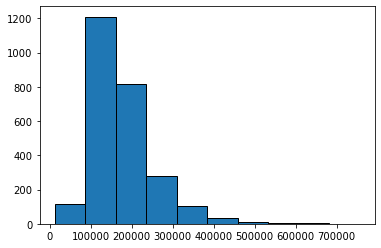

In [7]:
plt.hist(housing['SalePrice'],edgecolor='black')

(array([  1.,   0.,   5.,  27., 147., 883., 985., 421., 101.,  10.]),
 array([ 9.45634071,  9.86415394, 10.27196717, 10.6797804 , 11.08759363,
        11.49540687, 11.9032201 , 12.31103333, 12.71884656, 13.1266598 ,
        13.53447303]),
 <BarContainer object of 10 artists>)

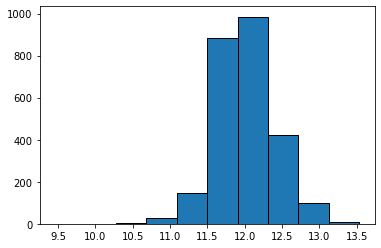

In [8]:
# Calculate natural logarithm on SalePrice

natural_log = np.log(housing['SalePrice'])

plt.hist(natural_log,edgecolor='black')


(array([4.000e+00, 3.500e+01, 3.290e+02, 1.112e+03, 6.970e+02, 2.750e+02,
        9.100e+01, 2.700e+01, 9.000e+00, 1.000e+00]),
 array([113.08846095, 188.67035084, 264.25224073, 339.83413062,
        415.41602051, 490.9979104 , 566.57980029, 642.16169018,
        717.74358007, 793.32546996, 868.90735985]),
 <BarContainer object of 10 artists>)

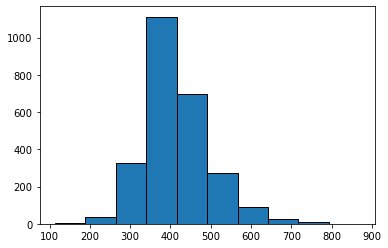

In [9]:
# Calculate sqrt on SalePrice
sqrt_housing = np.sqrt(housing['SalePrice'])

plt.hist(sqrt_housing,edgecolor='black')


In [10]:
# dropping ID column

housing.drop(columns=['PID'], inplace=True)

KeyError: "['PID'] not found in axis"

In [ ]:
# missing Values

# show only the count of columns with null values

columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA


In [ ]:
# check correlation of missing values columns to price


corr_col = list(columns_NA.index)
corr_col.append('SalePrice')
housing[corr_col].corr()

In [ ]:
# Delete Columns with Negative Correlations

#housing.drop(columns=['BsmtHalfBath'], inplace=True)



# Delete top 5 columns with missing values

#housing.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], inplace=True)

# Remove Columns with small correlation

#housing.drop(columns=['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','LotFrontage','GarageYrBlt'], inplace=True)

In [ ]:
# Fill the rest of Null. Columns with best fill based on Discription File



housing['MasVnrType'].fillna('None', inplace=True)


for i in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    housing[i].fillna('NA', inplace=True)

# Replacing small number of null value with most common value in column

housing['Electrical'].fillna(housing['Electrical'].value_counts().idxmax(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].value_counts().idxmax(), inplace=True)
housing['GarageCars'].fillna(housing['GarageCars'].value_counts().idxmax(), inplace=True)
housing['GarageArea'].fillna(housing['GarageArea'].value_counts().idxmax(), inplace=True)
housing['TotalBsmtSF'].fillna(housing['TotalBsmtSF'].value_counts().idxmax(), inplace=True)

# From the Data description File we see the following columns has the same values.
# Columns FireplaceQu ,BsmtQual,ExterQual ,ExterCond ,HeatingQC,BsmtCond ,GarageQual ,KitchenQual , GarageCond 
# they have the same values to decribe them :

# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor
# NA	No Garage


# so we replace the cahr values with numerical and NA with 0


housing['BsmtQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtQual'].fillna(0, inplace=True)

housing['ExterQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterQual'].fillna(0, inplace=True)

housing['ExterCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterCond'].fillna(0, inplace=True)

housing['HeatingQC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['HeatingQC'].fillna(0, inplace=True)

housing['BsmtCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtCond'].fillna(0, inplace=True)

housing['GarageQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageQual'].fillna(0, inplace=True)

housing['KitchenQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['KitchenQual'].fillna(0, inplace=True)

housing['GarageCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageCond'].fillna(0, inplace=True)

In [ ]:
columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA

In [ ]:
print("New Data set shape is : ",housing.shape)
print("\n\n")


housing.info()

In [ ]:
# Save new cleaned data

housing.to_csv('Housing_cleaned.csv')

In [ ]:
housing_cleaned = pd.read_csv('Housing_cleaned.csv', index_col=0)
housing = pd.read_csv('Housing_cleaned.csv', index_col=0)

In [11]:
housing.shape

(2580, 80)

In [ ]:
housing.duplicated().sum()

In [ ]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicateRows = housing_cleaned[housing_cleaned.duplicated()]
 
# Print the resultant Dataframe
duplicateRows

In [ ]:
housing_cleaned.drop_duplicates(keep='first')

In [ ]:
Realestate.head()


In [ ]:
Realestate.columns
Realestate.shape

In [ ]:
Realestate.info()

In [ ]:
Columns_NaN = Realestate.isna().sum()[Realestate.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(Columns_NaN))

Columns_NaN

In [ ]:
# 
Realestate.shape


In [ ]:
Realestate.duplicated().sum()

## Visualizations 

In [3]:
#Sales Price of Houses in different Neighborhood 
px.box(housing.sort_values(by=['SalePrice'],ascending=False),
       x='Neighborhood',y='SalePrice',
       color='Neighborhood',
       title='<b> Sales Price of Houses in different Neighborhood')



### This box plot shows the Sales Price of Houses in different Neighborhood in Ames city in Iowa, United States. It helped us to visualise the range of house prices were dealing with. Most of the sales price is below 500k

In [4]:
#Number of houses in each Neighborhoods
px.pie(housing.groupby('Neighborhood',as_index=False)['Neighborhood'].count(),
       values='Neighborhood',names='Neighborhood',labels={'Neighborhood':'Count'}
       ,color_discrete_sequence=px.colors.sequential.Plasma,
       hole=.5,title='<b> Houses Count in different Neighborhoods of IOWA</b>'
      )


# The pie display number of houses in each neighoborhoods.
- Higest neighoborhoods... with 418 which represent 15.9%
- Lowest neighoborhoods... with 1 which represent 0.0388% 


<AxesSubplot:>

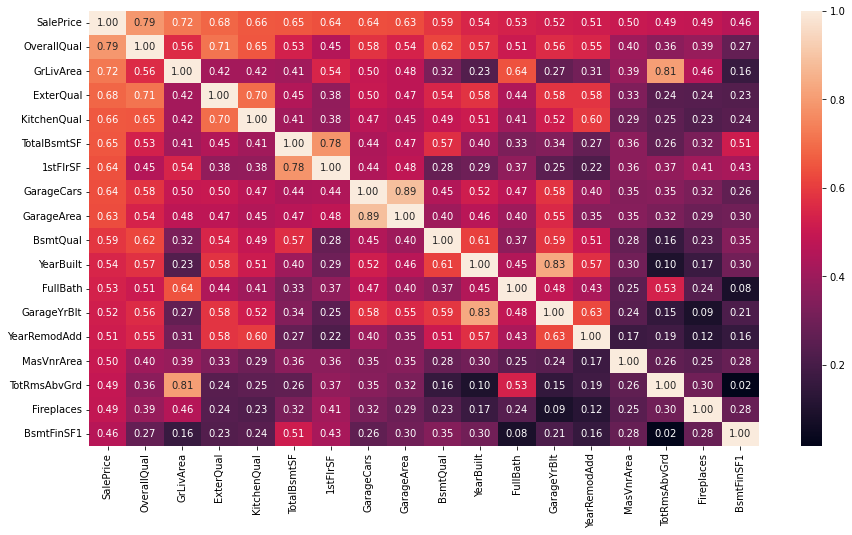

In [5]:
# Features with hight correlation only columns with correlation > 0.45

SalesCor = housing.corr()['SalePrice'].sort_values(ascending= False)

hight_correlation=housing[SalesCor[SalesCor.values > 0.45].index]


corr=hight_correlation.corr()
f, ax=plt.subplots(figsize=(15,8))
sns.heatmap(corr, annot = True, fmt = '.2f')

### In this heatmap we use features with hight correlation with sale price with correlation > 0.45
- Over all quality and Above grade (ground) living area square feet has higher corrleation.

In [19]:
plt.figure(figsize=(15, 10))
fig1 = px.box(housing, x="OverallQual", y="SalePrice",color = 'OverallQual')
fig.update_layout(
    title="House Price by Overall Quality",
    xaxis_title="Quality",
    yaxis_title="Price ($)",
    legend_title="Legend Title",
    showlegend=False,
     xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
    )

fig1.show()

<Figure size 1080x720 with 0 Axes>

## -There is a hight realation between Sale Price and Quality, as the quality increase the price of the house increases.

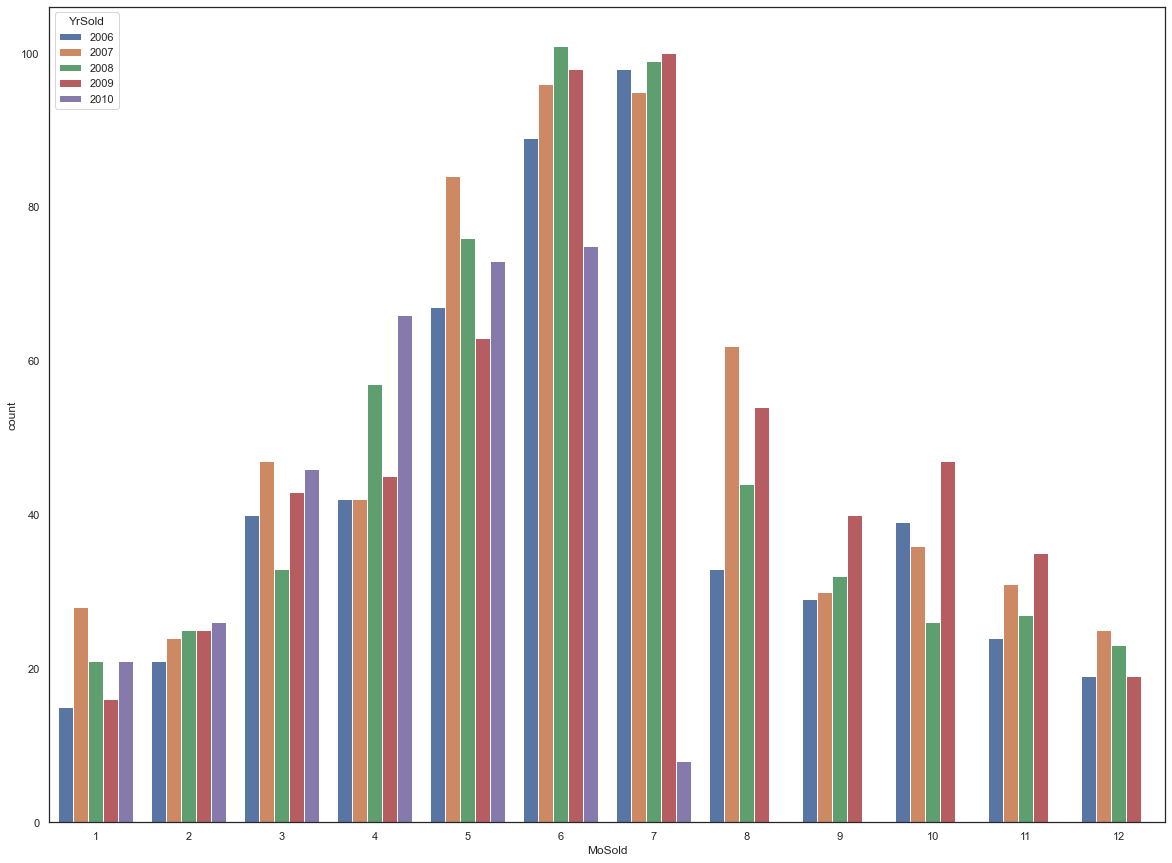

In [7]:
#Count of houses sold against month sold sliced by year sold
sns.set(style="white")
plt.figure(figsize=(20,15))
sns.countplot(x='MoSold' , hue="YrSold", data=housing )
plt.show()
 

## People tend to move during the summer. 
- 5 and 6 , 7 months have higher sold houses counts. 

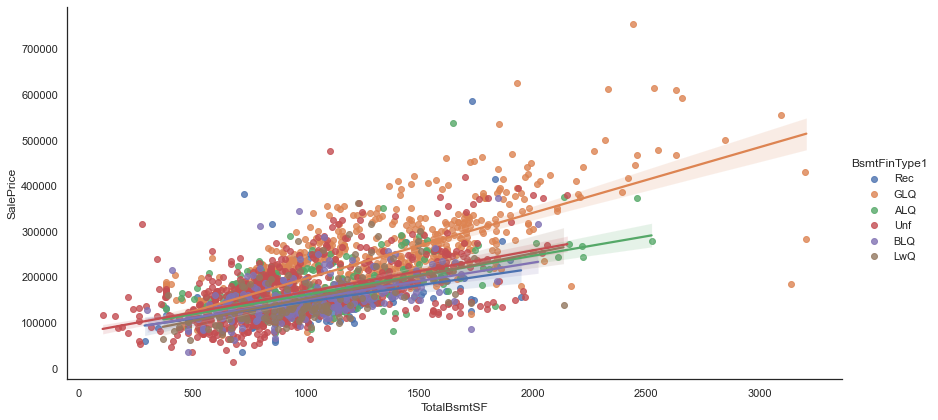

In [8]:
#Sales price against Total Basment sliced by BsmtFinType1
sns.lmplot(x='TotalBsmtSF', y='SalePrice', hue='BsmtFinType1',
           data=housing, fit_reg=True,height=6, aspect=2)

###  - Scatter plots helps to find the linear relation and also to observe outliers right away.
###  - In this polt we can see the relation between SalePrice and Total square feet of basement area. As the basment area increase the sale price increases.

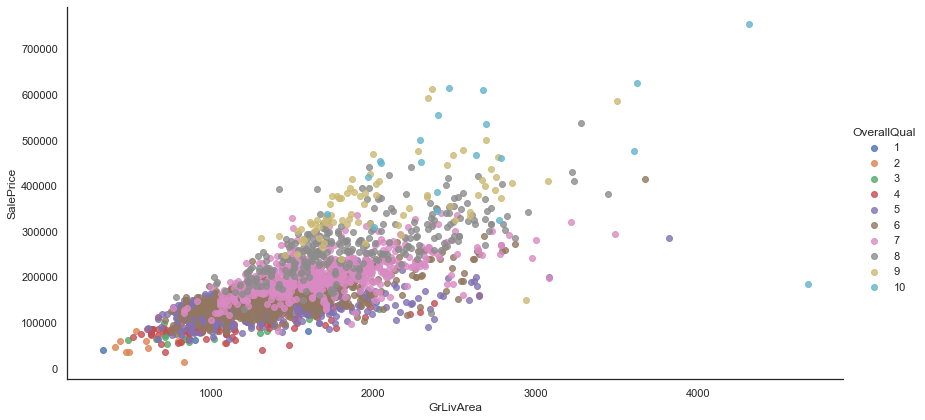

In [9]:
#sales price against Living Area sliced by Overall Quality
sns.lmplot(x='GrLivArea', y='SalePrice', hue='OverallQual',
           data=housing, fit_reg=False,height=6, aspect=2)



### - Above grade (ground) living area square feet on of features which has hight correlation with Sale Price. 
### -The sale price increase as the ground area increases. Also, the overall quality shows the quality of the materials used in the construction of the house has a direct relationship with the price.

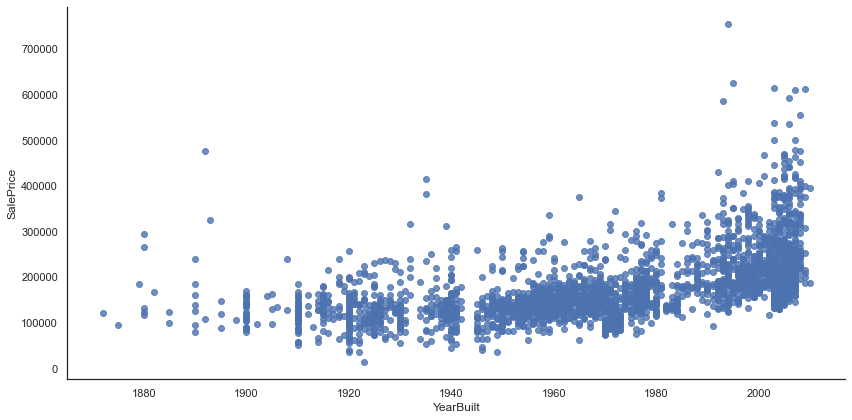

In [10]:
#sales price against Year Built sliced by Sale Condition
sns.lmplot(x='YearBuilt', y='SalePrice'# hue='YearRemodAdd'
           ,
           data=housing, fit_reg=False,height=6, aspect=2)


### -The new houses has higher prices.

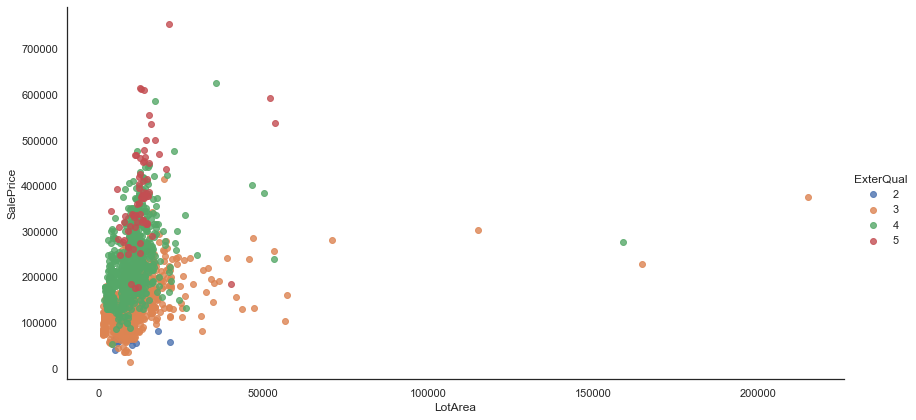

In [11]:
#sales price against LotArea size in square feet sliced by Eternal Quality
sns.lmplot(x='LotArea', y='SalePrice', hue='ExterQual',
           data=housing, fit_reg=False,height=6, aspect=2)


 ### - (LotArea) Lot size in square feet does not affect the price of the house, most houses have a small land area. As for the external quality, it affects the price directly

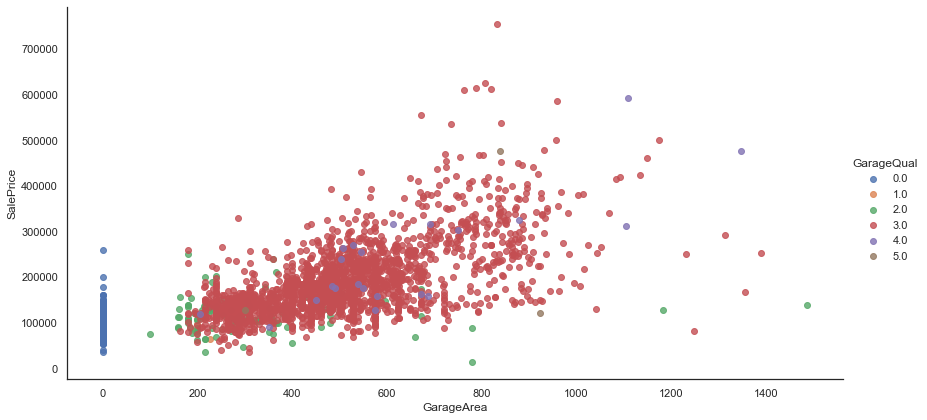

In [12]:
#Sales price against Garage Area sliced by Garage Quality
sns.lmplot(x='GarageArea', y='SalePrice', hue='GarageQual',
           data=housing, fit_reg=False,height=6, aspect=2)


### - Garage Area affect the house price.Most of the garages are in a medium condition of quality and this is evident by the red color.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.0, 'HeatingQC vs SalePrce')

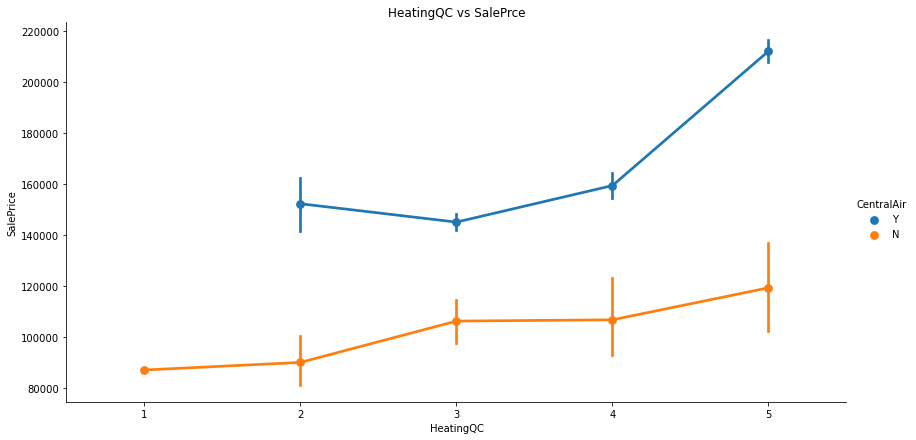

In [22]:
#Sale price vs Heating quality and condition  
sns.factorplot(data=housing,x='HeatingQC',y='SalePrice',
               hue='CentralAir',size=6,aspect=2,
               estimator=np.mean)
plt.title('HeatingQC vs SalePrce')

### - Houses having central air conditioning have higher price from houses that dont have

In [15]:
px.box(housing,x='BedroomAbvGr',y='SalePrice'
       #,color='Neighborhood'
       ,
       title='<b>Total Rooms Versus Sales Price of Houses')

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



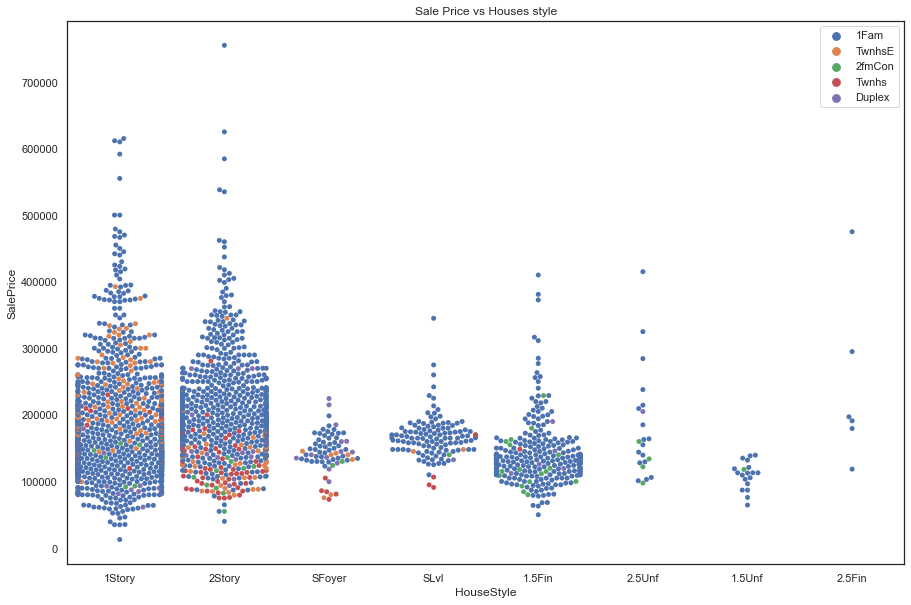

In [21]:
#Sale price against House Style sliced by building type
plt.figure(figsize=(15, 10))
sns.swarmplot('HouseStyle','SalePrice',hue='BldgType',alpha=1,data=housing )
plt.title('Sale Price vs Houses style')
plt.legend(loc='upper right')


### - The majority of buyers buy one-story or two-story homes with one family building type.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\ask91\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

10.4% of the points cannot 

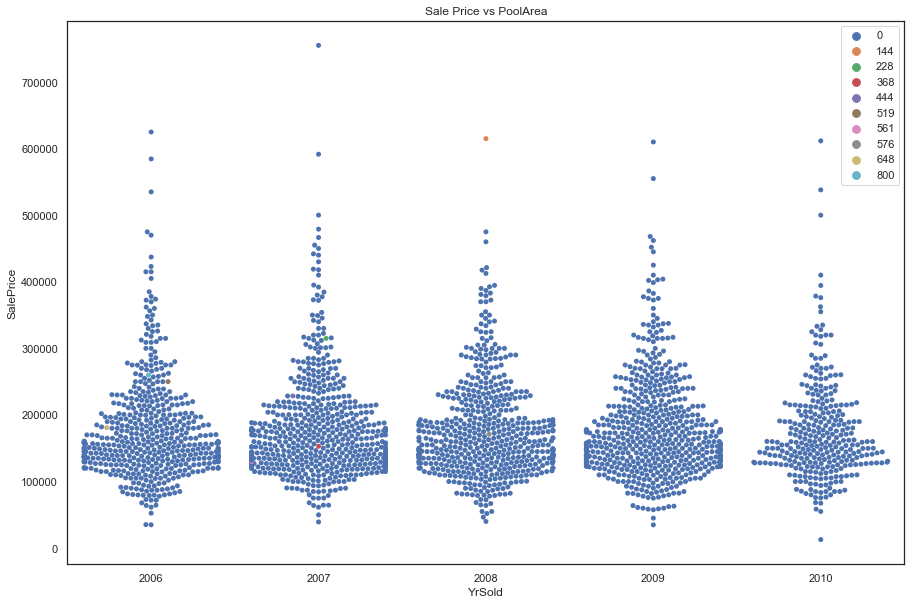

In [22]:
#sales price against Year Sold sliced by PoolArea

plt.figure(figsize=(15, 10))
sns.swarmplot('YrSold','SalePrice',hue='PoolArea',data=housing )
plt.title('Sale Price vs PoolArea')
plt.legend(loc='upper right')


### - Buyers are not interested in whether the house has a swimming pool or not, and this is evident through the years of sale.

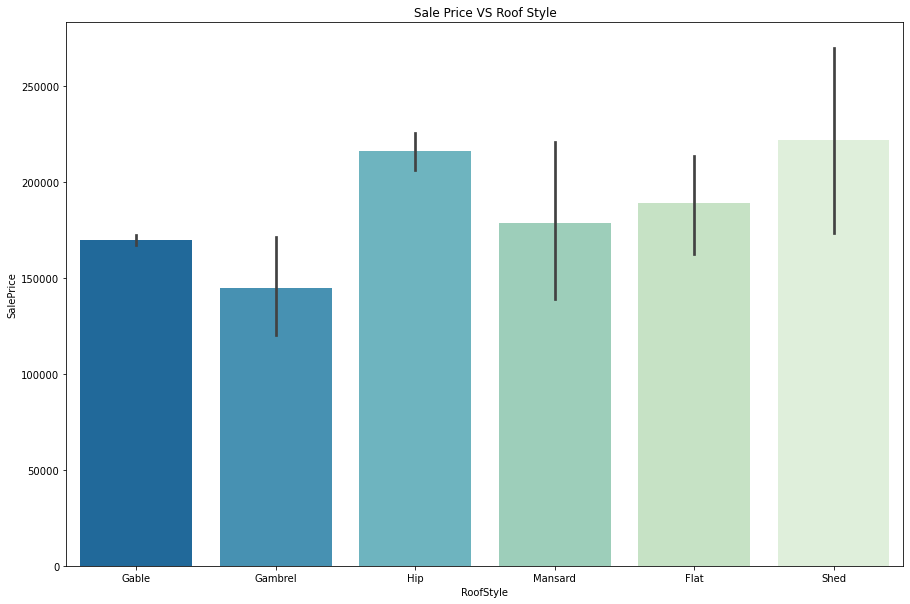

In [26]:
plt.figure(figsize=(15, 10))
housing_sort=housing.sort_values('SalePrice',ascending=True)
sns.barplot(data=housing_sort,
            y='SalePrice',
            x='RoofStyle',
            palette='GnBu_r'
            #,hue='RoofMatl'
           )
title = plt.title("Sale Price VS Roof Style")


# ML Prediction

In [23]:
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
housing = pd.read_csv('Housing_cleaned.csv', index_col=0)

In [25]:
housing = housing[housing.GrLivArea < 4500]

In [26]:
housing = housing[housing.SalePrice < 500000]

In [27]:
#Independet Variables
X = housing.drop(['SalePrice'], axis=1)
#Target 
#y = housing_cleaned['SalePrice'].reset_index(drop=True)
y = housing['SalePrice']


In [28]:
print(X.shape)
print(y.shape)

(2567, 79)
(2567,)


In [29]:
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
X['MSSubClass'] = X['MSSubClass'].apply(str)
X['YrSold'] = X['YrSold'].astype(str)
X['MoSold'] = X['MoSold'].astype(str)

X['Functional'] = X['Functional'].fillna('Typ')
X['Electrical'] = X['Electrical'].fillna("SBrkr")
X['KitchenQual'] = X['KitchenQual'].fillna("TA")
X['Exterior1st'] = X['Exterior1st'].fillna(X['Exterior1st'].mode()[0])
X['Exterior2nd'] = X['Exterior2nd'].fillna(X['Exterior2nd'].mode()[0])
X['SaleType'] = X['SaleType'].fillna(X['SaleType'].mode()[0])
X["PoolQC"] = X["PoolQC"].fillna("None")

In [30]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    X[col] = X[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    X[col] = X[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    X[col] = X[col].fillna('None')

X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [31]:
X = X.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

X['YrBltAndRemod']=X['YearBuilt']+X['YearRemodAdd']
X['TotalSF']=X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']

X['Total_sqr_footage'] = (X['BsmtFinSF1'] + X['BsmtFinSF2'] +
                                 X['1stFlrSF'] + X['2ndFlrSF'])

X['Total_Bathrooms'] = (X['FullBath'] + (0.5 * X['HalfBath']) +
                               X['BsmtFullBath'] + (0.5 * X['BsmtHalfBath']))

X['Total_porch_sf'] = (X['OpenPorchSF'] + X['3SsnPorch'] +
                              X['EnclosedPorch'] + X['ScreenPorch'] +
                              X['WoodDeckSF'])


In [32]:
# simplified features (convert string binary categorical values into 0 and 1)
X['haspool'] = X['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
X['has2ndfloor'] = X['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
X['hasgarage'] = X['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
X['hasbsmt'] = X['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
X['hasfireplace'] = X['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
# filling object type with None
objects = []
for i in X.columns:
    if X[i].dtype == object:
        objects.append(i)

X.update(X[objects].fillna('None'))

In [34]:
# Filling in the rest of the NA's
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numerics.append(i)
X.update(X[numerics].fillna(0))


In [35]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numerics2.append(i)

In [36]:
X.shape

(2567, 86)

In [37]:
X = pd.get_dummies(X).reset_index(drop=True)
X.shape


(2567, 306)

In [46]:
# Droping the overfitting features
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)

In [47]:
X.shape

(2567, 291)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2) 

In [49]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# LinearRegression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
regr=LinearRegression()

In [52]:
regr.fit(X_train,y_train)

LinearRegression()

In [53]:
pred=regr.predict(X_test)

# LinearRegression efficiency

In [54]:
regr.score(X_test,y_test)

0.9239754126110096

Text(0.5, 1.0, 'Predictions of Sale Price vs Actual Sale Price')

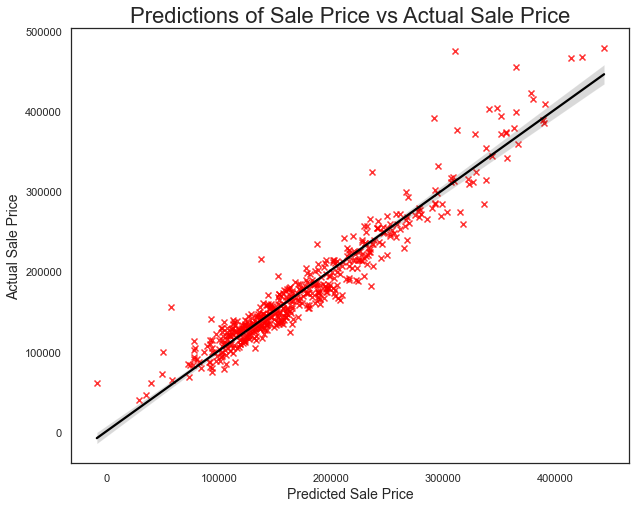

In [56]:

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_scaled, x=pred, y=y_test, marker='x', color='red', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)

# DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree_model =DecisionTreeClassifier()

In [58]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
tree_pred=tree_model.predict(X_test)

# DecisionTreeClassifier efficiency

In [60]:
accuracy_score(y_test,tree_pred)


0.005836575875486381

# Gradient Boosting Model

In [61]:
gbm = GradientBoostingRegressor()

In [62]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

# Gradient Boosting efficiency

In [63]:
gbm.score(X_train,y_train)

0.9621043297690074

In [64]:
gbm_pred=gbm.predict(X_test)

Text(0.5, 1.0, 'Predictions of Sale Price vs Actual Sale Price')

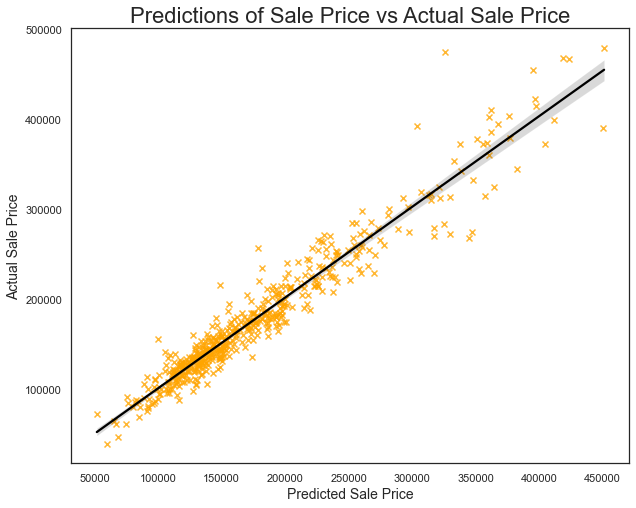

In [66]:

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_scaled, x=gbm_pred, y=y_test, marker='x', color='orange', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)

In [67]:
importance = sorted(list(zip(X_train.columns, list(gbm.feature_importances_))), key=lambda t:t[1], reverse=True)

In [68]:
a, b = zip(*importance)
importance_score = pd.DataFrame({'feature':a, 'score':b})

In [69]:
importance_fet = importance_score[importance_score['score'] > 0.01]

Text(0.5, 1.0, 'Feature importance of a gbm classifier')

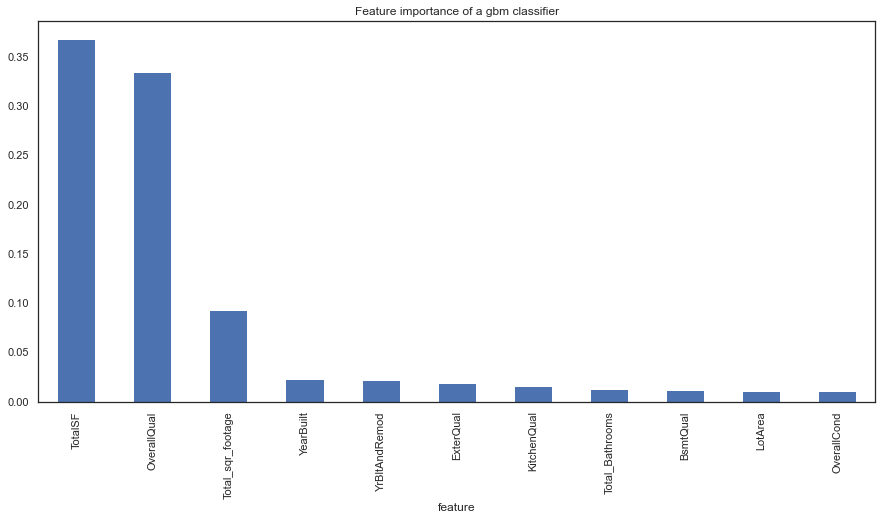

In [70]:
#list top 10 importance features for gbm
plt.rcParams["figure.figsize"] = (15, 7)
importance_fet.plot.bar(x='feature', y='score', legend=None)
plt.title('Feature importance of a gbm classifier')

In [71]:
pred

array([171735.4167626 , 115714.12983553, 153391.50414837, 138209.02713331,
       186989.27189196, 219756.50661298,  92189.08343678, 292436.72111458,
       145641.47680479, 164687.28423567, 165693.10615875, 228153.16849169,
       141187.66259361, 141700.96022937, 151137.67568629, 139936.10144757,
       423981.84330355, 160144.93974016, 113770.87514012, 120237.10361246,
       162372.37046338, 228205.74712772, 265139.99262502, 114888.28918128,
       149397.60390397, 298181.22248321, 159897.43028357,  49256.32391315,
       146764.94676713, 164946.32659163, 246030.56876913, 178724.31524375,
        98644.55674978, 106579.11309622, 165477.30849478, 267181.99473955,
       206361.29638944, 152312.90965211, 146292.70366291, 155654.2100452 ,
       194337.49926567, 162593.73795063,  58339.33714116, 152385.17878369,
       146720.73513244, 163040.74128207,  93630.92270166, 153854.80002899,
       133038.55476397, 223728.92663175, 112476.47338359, 157540.08059513,
       216192.80188623, 2

# Lasso

In [72]:
from sklearn.linear_model import Lasso 
lasso=Lasso(alpha=1.0)

In [73]:
lasso.fit(X_train,y_train)

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.968e+11, tolerance: 9.615e+08



Lasso()

In [74]:
y_pred=lasso.predict(X_test)

In [75]:
print("Slope: %.2f" % lasso.coef_[0])

Slope: 89.60


In [76]:
print("Intercept:%.2f"% lasso.intercept_)

Intercept:-915592.95


In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

405041579.14198077

In [78]:
np.sqrt(mean_squared_error(y_test,y_pred))

20125.644813073213

# Lasso  efficiency

In [79]:
print("Rsquared:%.2f" % lasso.score(X_test,y_test))

Rsquared:0.93


In [80]:
def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for {model} is {round(cross_val_score(model, X_train, y_train).mean(),4)}')
    print(f'The training score is {round(model.score(X_train, y_train), 4)}')
    print(f'The testing score is {round(model.score(X_test, y_test),4)}')
    print(f'The number of features is : {np.sum(model.coef_ != 0)}')

In [81]:
lasso = Lasso(alpha = 0.0002)
lasso.fit(X_train, y_train);


display_R2_scores(lasso, X_train, y_train, X_test, y_test)

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.929e+11, tolerance: 9.615e+08

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.256e+11, tolerance: 7.623e+08

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+11, tolerance: 7.317e+08

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_co

The mean cross validation score for Lasso(alpha=0.0002) is 0.9108
The training score is 0.9391
The testing score is 0.9242
The number of features is : 289


In [82]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

Text(0.5, 1.0, 'Predictions of Sale Price vs Actual Sale Price')

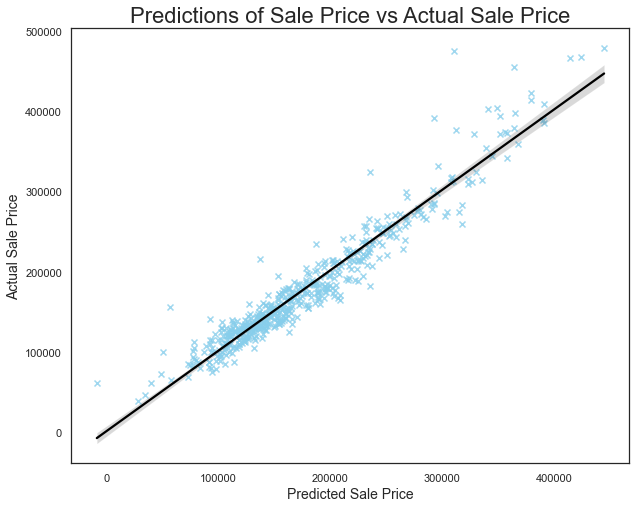

In [83]:
lasso_predict = lasso.predict(X_test)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_scaled, x=lasso_predict, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)

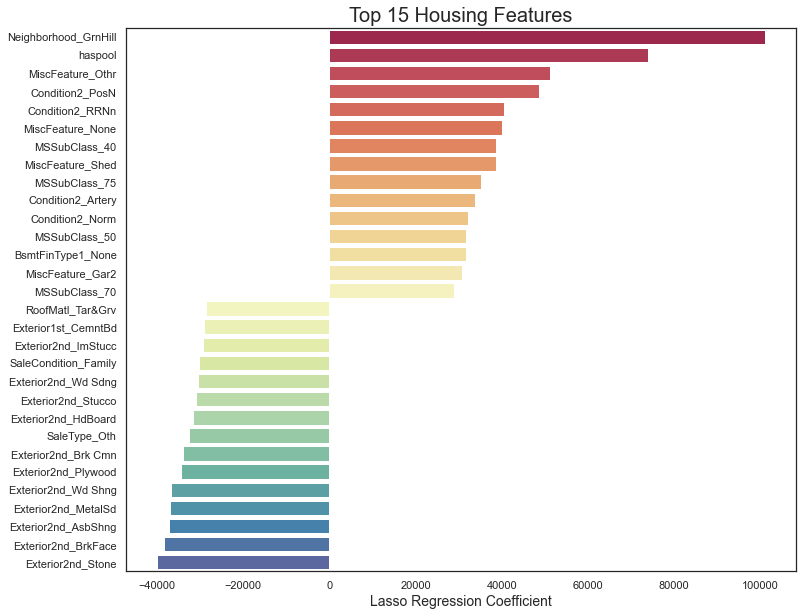

In [84]:
lasso_df = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
lasso_df['Abs Coef'] = abs(lasso.coef_)
lasso_df['Coef'] = lasso.coef_
lasso_df['Feature'] = X.columns 

# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(12,10))
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(30)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Spectral')
ax.set_ylabel('')
ax.set_yticklabels(data['Feature'], size=11)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=14)
plt.title('Top 15 Housing Features', fontsize=20);

In [85]:
ridge = Ridge(alpha = 10222) # To improve my Ridge, I manually adjusted the alpha score; the Ridge CV returned smaller alphas (even if the upper limit was increased) 
ridge = ridge.fit(X_train, y_train)


display_R2_scores(ridge, X_train, y_train, X_test, y_test)

The mean cross validation score for Ridge(alpha=10222) is 0.8322
The training score is 0.8446
The testing score is 0.8575
The number of features is : 290


In [88]:
results = [ ['Lasso', lasso.score(X,y)],
           ['Gradient Boosting Regressor' , gbm.score(X,y) ],
           ['Linear Regression',regr.score(X,y)]
           ,['Ridge',ridge.score(X,y)]]

            

CompareModels = pd.DataFrame(results,
                  columns = ['Name' , 'Score'])
 
CompareModels = CompareModels.sort_values('Score',ascending=True)


# boxplot algorithm comparison


fig2 = px.bar(CompareModels, x="Name", y="Score",color = 'Name')
fig.update_layout(
    title="Modles Comparison",
    xaxis_title="Name",
    yaxis_title="Score",
    legend_title="Legend Title",
    showlegend=False,
     xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
    )




fig2.show()

# Area 

In [160]:
import geopy
from geopy.geocoders import Nominatim
from geopy.geocoders import ArcGIS
from geopy.extra.rate_limiter import RateLimiter

locator=ArcGIS()
#locator = Nominatim(user_agent="myGeocoder")

location = locator.geocode("105 S 16TH ST, Ames")


In [161]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1.5)

In [162]:
location

Location(105 S 16th St, Ames, Iowa, 50010, (42.00879801158271, -93.61084698401896, 0.0))

In [163]:
location.latitude

42.00879801158271

In [164]:
location.longitude

-93.61084698401896

In [165]:
import folium 

In [166]:
housing_loc = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)


In [167]:
Realestate_loc= pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)

C:\Users\ask91\AppData\Local\Temp\ipykernel_4892\2662636268.py:1: DtypeWarning:

Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.



In [168]:
Realestate_location=pd.merge(housing_loc,Realestate_loc,left_on='PID',right_on='MapRefNo')

In [169]:
Realestate_location = Realestate_location[Realestate_location.MA_City =='AMES']

In [170]:
Realestate_location['Address']=Realestate_location['MA_Line1']+','+Realestate_location['MA_City']

In [171]:
Realestate_location_address=Realestate_location[['Address']]

In [172]:
test=Realestate_location_address[['Address']].head(50)

In [173]:
test['Address']

0           2088 QUAIL RIDGE RD,AMES
1                  3416 WEST ST,AMES
2                  3416 WEST ST,AMES
3                  320 S 2ND ST,AMES
4              1524 DOUGLAS AVE,AMES
5             2304 FILLMORE AVE,AMES
6              4003 MARIGOLD DR,AMES
7                   212 10TH ST,AMES
8              2431 LAKESIDE DR,AMES
9              602 KEN MARIL RD,AMES
11             3629 CHILTON AVE,AMES
12             700 KEN MARIL RD,AMES
15             812 TENNYSON AVE,AMES
16             5220 MARYLAND ST,AMES
17              319 HARTFORD DR,AMES
18                 2910 WOOD ST,AMES
19       2102 PRAIRIE VIEW EAST,AMES
22             1216 CARROLL AVE,AMES
24              829 DOUGLAS AVE,AMES
25             4019 WESTLAWN DR,AMES
26           4205 CRESTMOOR AVE,AMES
27           3028 COTTONTAIL LN,AMES
28              2711 HAMPTON ST,AMES
29              1636 JOHNSON ST,AMES
30               3331 WESTON DR,AMES
31                 926 DUFF AVE,AMES
32              4302 WELBECK DR,AMES
3

In [174]:
test['coordinates']=test['Address'].apply(locator.geocode)

In [175]:
test['coordinates']

0     (2088 Quail Ridge Rd, Ames, Iowa, 50010, (42.0...
1     (3416 West St, Ames, Iowa, 50014, (42.02469198...
2     (3416 West St, Ames, Iowa, 50014, (42.02469198...
3     (320 S 2nd St, Ames, Iowa, 50010, (42.02142501...
4     (1524 Douglas Ave, Ames, Iowa, 50010, (42.0380...
5     (2304 Fillmore Ave, Ames, Iowa, 50010, (42.044...
6     (4003 Marigold Dr, Ames, Iowa, 50014, (42.0190...
7     (212 10th St, Ames, Iowa, 50010, (42.031066004...
8     (2431 Lakeside Dr, Ames, Iowa, 50010, (42.0633...
9     (602 Ken Maril Rd, Ames, Iowa, 50010, (41.9863...
11    (3629 Chilton Ave, Ames, Iowa, 50010, (42.0571...
12    (700 Ken Maril Rd, Ames, Iowa, 50010, (41.9863...
15    (812 Tennyson Ave, Ames, Iowa, 50014, (42.0157...
16    (5220 Maryland St, Ames, Iowa, 50014, (42.0357...
17    (319 Hartford Dr, Ames, Iowa, 50014, (42.02517...
18    (2910 Wood St, Ames, Iowa, 50014, (42.02192599...
19    (2102 Prairie Vw E, Ames, Iowa, 50010, (42.042...
22    (1216 Carroll Ave, Ames, Iowa, 50010, (42.

In [176]:
test['latitude']=test['coordinates'].apply(lambda x:x.latitude)
test['longitude']=test['coordinates'].apply(lambda x:x.longitude)

In [177]:
a_list=test[['Address','latitude','longitude']].values.tolist()

In [178]:
a_list

[['2088 QUAIL RIDGE RD,AMES', 42.08578600179675, -93.58617996498299],
 ['3416 WEST ST,AMES', 42.02469198593158, -93.66417298729726],
 ['3416 WEST ST,AMES', 42.02469198593158, -93.66417298729726],
 ['320 S 2ND ST,AMES', 42.02142501344039, -93.6149009753088],
 ['1524 DOUGLAS AVE,AMES', 42.03809100298122, -93.61205003858174],
 ['2304 FILLMORE AVE,AMES', 42.04492401426887, -93.63188497425611],
 ['4003 MARIGOLD DR,AMES', 42.01908700727816, -93.67163698825595],
 ['212 10TH ST,AMES', 42.031066004201335, -93.61293902323253],
 ['2431 LAKESIDE DR,AMES', 42.06338901168826, -93.6427289776703],
 ['602 KEN MARIL RD,AMES', 41.98632801509757, -93.60360501967538],
 ['3629 CHILTON AVE,AMES', 42.05712500589766, -93.65140801931331],
 ['700 KEN MARIL RD,AMES', 41.98637998289726, -93.60214497596125],
 ['812 TENNYSON AVE,AMES', 42.015733994550885, -93.68752396371566],
 ['5220 MARYLAND ST,AMES', 42.03574201652583, -93.68995798457878],
 ['319 HARTFORD DR,AMES', 42.02517298144528, -93.68941802237622],
 ['2910 W

In [179]:
import folium
test_map=folium.Map(location=[42.03809100298122,-93.61205003858174])
fg=folium.FeatureGroup(name='test_location')
for i in a_list:
    fg.add_child(folium.Marker(location=[i[1],i[2]],popup=i[0],icon=folium.Icon(color="red")))

test_map.add_child(fg)

In [ ]:
test_map.save('Ames_houses.html')